### 导包，设定超参数

In [1]:
from methods.our_method import Our_method
from methods.trans_lasso import Trans_lasso
from methods.t_lasso import T_lasso
from methods.least_square import Least_square


from evaluator.evaluator import *
from evaluator.sample_generator import *
from tqdm import tqdm
from matplotlib import pyplot as plt
import time
import numpy as np

In [2]:
n_features=16
n_samples=100
n_packs=101
s=16

### 测试1：t11（独立同分布、同质、固定差异），与lasso对比

In [3]:
models=[Our_method(n_features,s,1),T_lasso(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list.npy',result_list)

100%|██████████| 11/11 [1:26:47<00:00, 473.38s/it]


In [4]:
result_list[0][0]

array([[0.193804  , 0.41059234, 0.16718221, 0.17056553, 0.14929945,
        0.2949053 , 0.11210663, 0.13686363, 0.1938621 , 0.46276565,
        0.16408502, 0.1052408 , 0.18047821, 0.15755956, 0.15829631,
        0.13464982, 0.16589093, 0.1506213 , 0.11023325, 0.27690762,
        0.13530683, 0.25783578, 0.19783544, 0.20911316, 0.13718822,
        0.14880592, 0.15374634, 0.2829065 , 0.10598   , 0.1791907 ,
        0.23539294, 0.2441445 , 0.29617922, 0.07627951, 0.13235662,
        0.20387355, 0.14754837, 0.28243195, 0.19155142, 0.09845304,
        0.13691446, 0.19146585, 0.17945609, 0.16693292, 0.43681348,
        0.10555306, 0.15468309, 0.175694  , 0.20015902, 0.16985369,
        0.09602178, 0.11431378, 0.21514913, 0.27523342, 0.13536617,
        0.19843705, 0.18158027, 0.27863671, 0.29324248, 0.14771447,
        0.18714289, 0.22672349, 0.16999561, 0.07735073, 0.13120107,
        0.2379136 , 0.20922493, 0.0798868 , 0.16401366, 0.08243623,
        0.132514  , 0.28189269, 0.29855397, 0.23

In [5]:
result_list.shape

(2, 11, 2, 100)

In [8]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

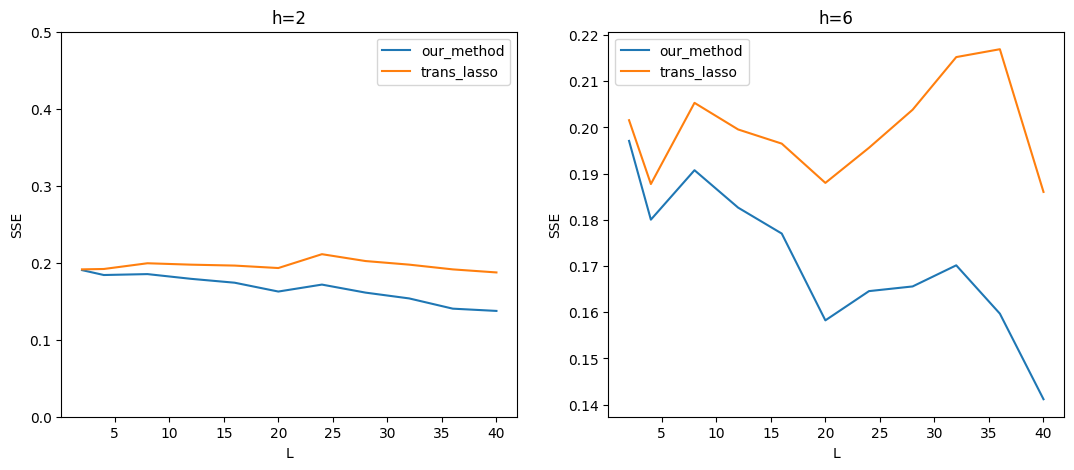

In [9]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试2：t11（独立同分布、同质、固定差异），与三模型对比，其中translasso的第一步改为最小二乘，我们的方法新增退出条件v不变

In [8]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list2-1.npy',result_list)

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
result_list.shape

(2, 11, 4, 60)

In [ ]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

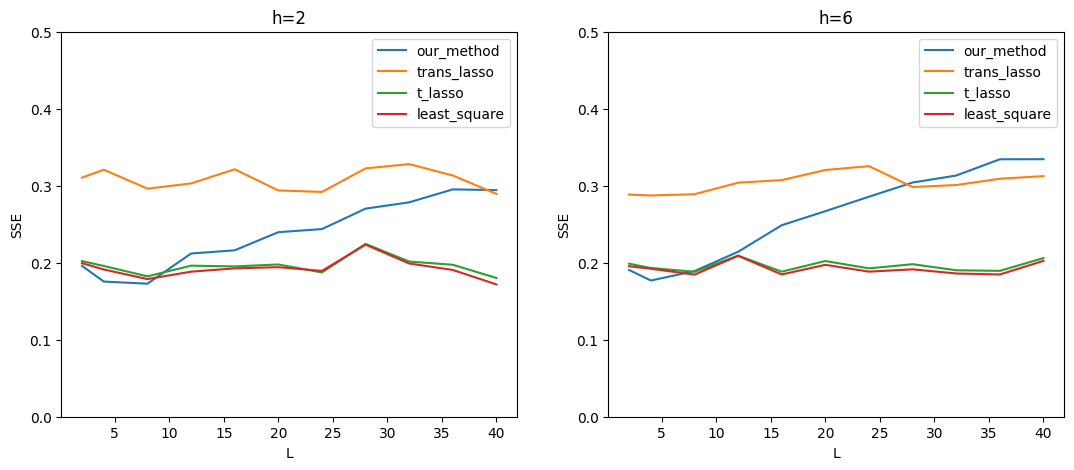

In [ ]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

#### ?????什么？

### 测试3：t12（独立同分布、同质、随机差异），与三模型对比

In [3]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t12_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list2-2.npy',result_list)

100%|██████████| 11/11 [33:39<00:00, 183.61s/it]


In [3]:
result_list=np.load('result_list2-2.npy')
result_list.shape

(2, 11, 4, 60)

In [4]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

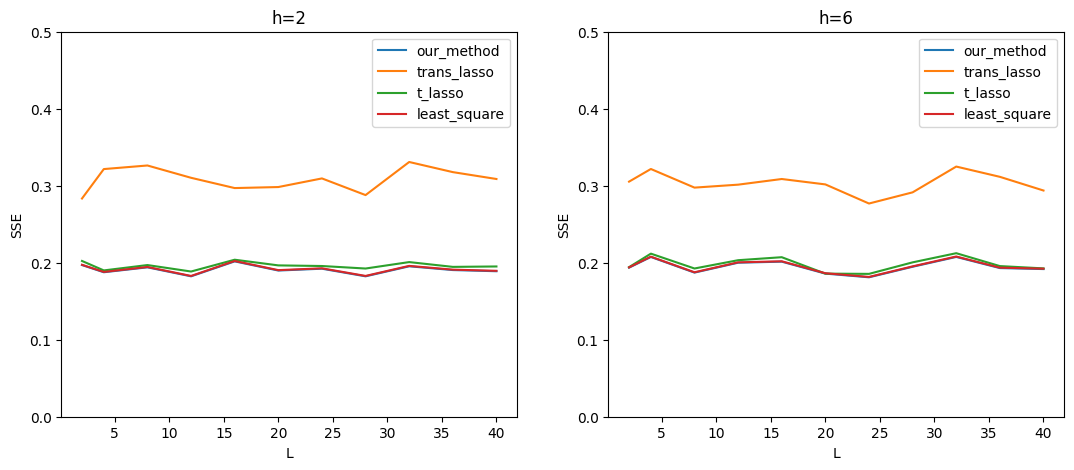

In [5]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试4：重新进行测试2

In [3]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
#加日期：月-日
np.save('log/result_list4'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

100%|██████████| 11/11 [41:16<00:00, 225.17s/it]


In [4]:
result_list.shape

(2, 11, 4, 60)

In [5]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

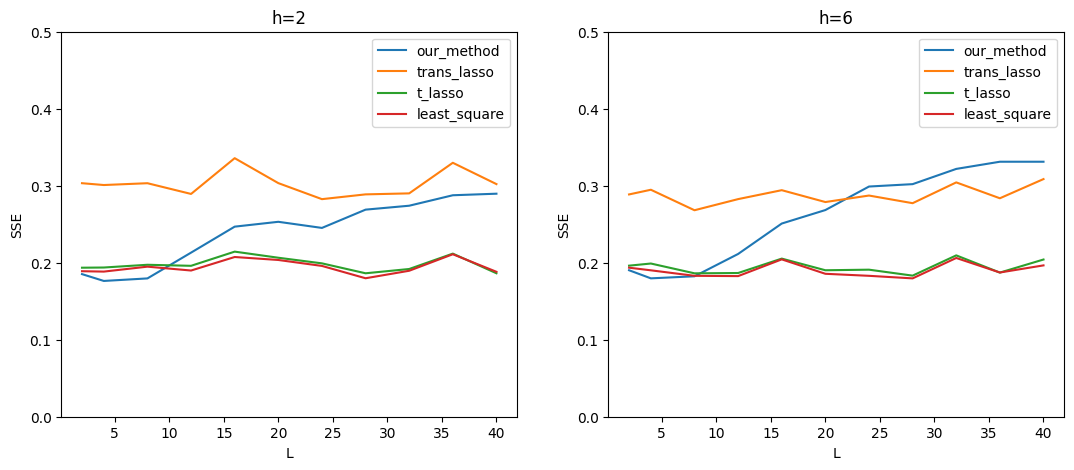

In [6]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试5：t22(不独立同分布、同质、随机差异)，与三模型对比


In [6]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t22_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('log/result_list5'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [37:06<00:00, 202.40s/it]


In [7]:
result_list.shape

(2, 11, 4, 60)

In [8]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

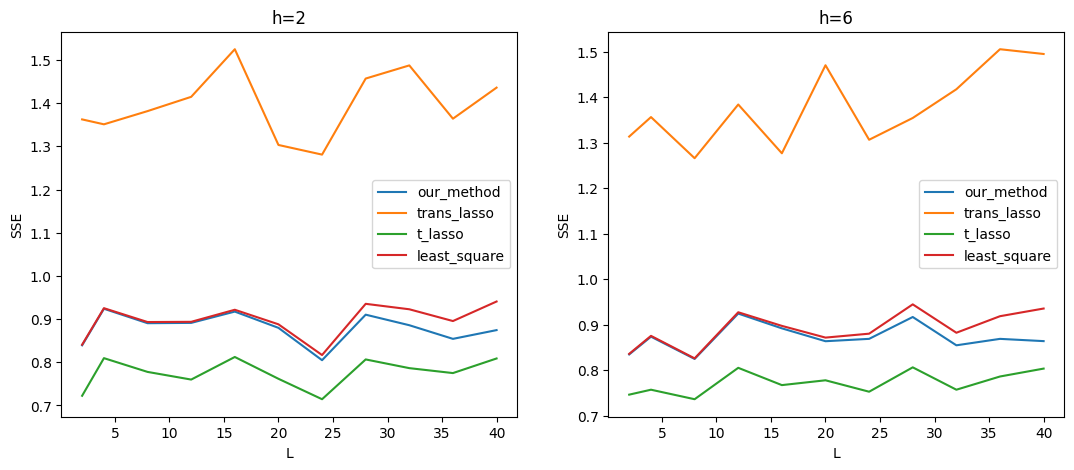

In [9]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试6：重新进行测试1

In [8]:
models=[Our_method(n_features,s,1),T_lasso(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list6-1.npy',result_list)

100%|██████████| 11/11 [25:52<00:00, 141.12s/it]


In [9]:
result_list.shape

(2, 11, 2, 60)

In [10]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

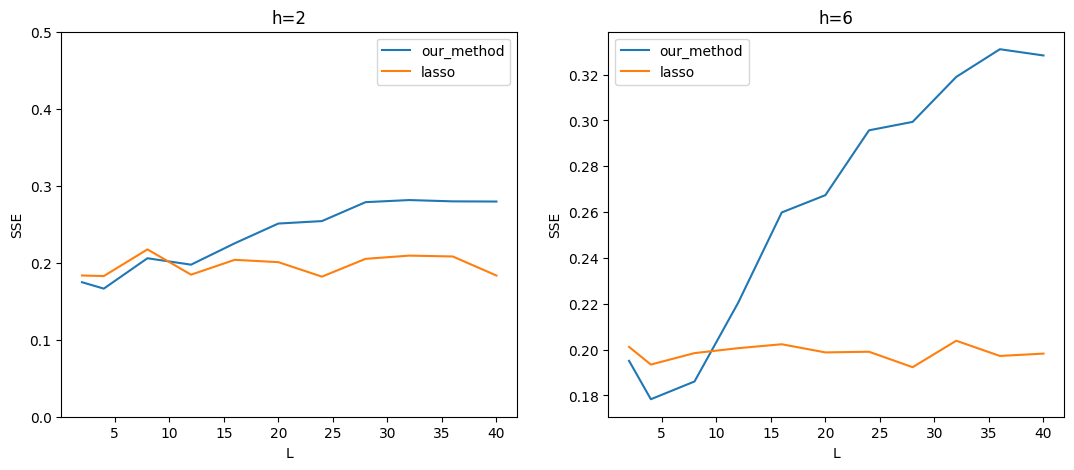

In [11]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试7：重新进行测试1
> 将v的退出条件取消

In [3]:
models=[Our_method(n_features,s,1),T_lasso(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):
            sample_packs,coef_true=t11_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('result_list7-1.npy',result_list)

  0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
result_list.shape

(2, 11, 2, 60)

In [5]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

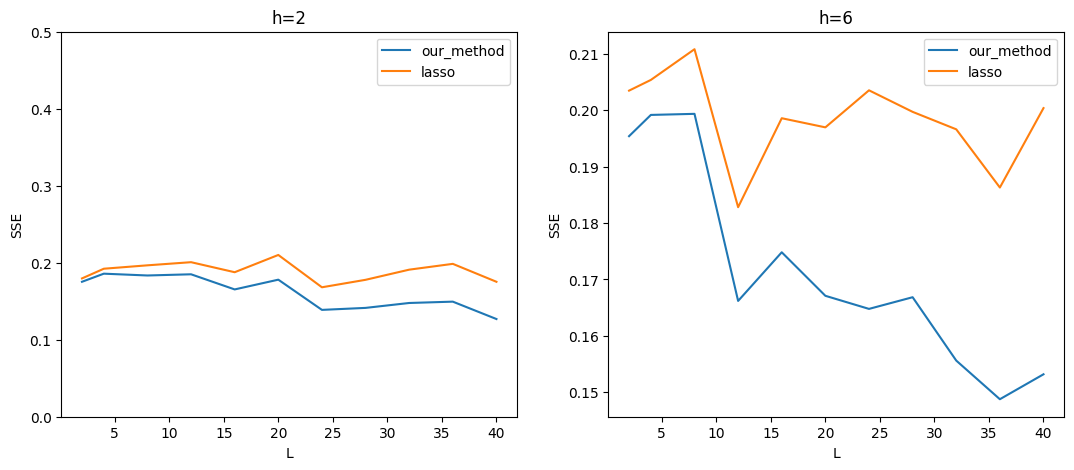

In [6]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试8：t32(不独立同分布、不同质、随机差异)，与三模型对比


In [10]:
def t32(n_features,s,n_packs,n_samples,h,L):
    coef_true = np.zeros(n_features)
    coef_true[:s] = 0.3
    samples_packs=[]
    # 设定超参数：各模型回归系数、特征间的协方差矩阵、噪声的均值与方差
    # 长度为n_features, 其中前s个为非零回归系数，后n_features-s个为零
    #生成样本
    for i in range(n_packs):
        cov=None
        if i<1:
            cov = np.eye(n_features)
        else:
            cov = np.zeros((n_features,n_features))
            for j in range(n_features):
                for k in range(n_features):
                    if k==j:
                        cov[j][k]=1
                    elif np.abs(j-k)<2*i+1:
                        cov[j][k]=1/(i+2)
        
        delta = np.zeros(n_features)
        #在0~n_features之间随机选取h个位置，将其回归系数减0.3
        if i==0:
            pass
        elif i<L+1:
            #delta的前100项为独立同分布的高斯随机变量
            delta[:10]=np.random.normal(0,h/100,10)
        else:
            delta[:10]=np.random.normal(0,2*s/100,10)
        coef=coef_true+delta
        noise_mean = 0
        noise_var = 1
        X, y = coef_gen(coef, cov, noise_mean, noise_var, n_samples)
        samples_packs.append(samples_pack(X, y))
    return samples_packs,coef_true

In [11]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t32(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('log/result_list8'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

100%|██████████| 11/11 [32:57<00:00, 179.80s/it]


In [12]:
result_list.shape

(2, 11, 4, 60)

In [13]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

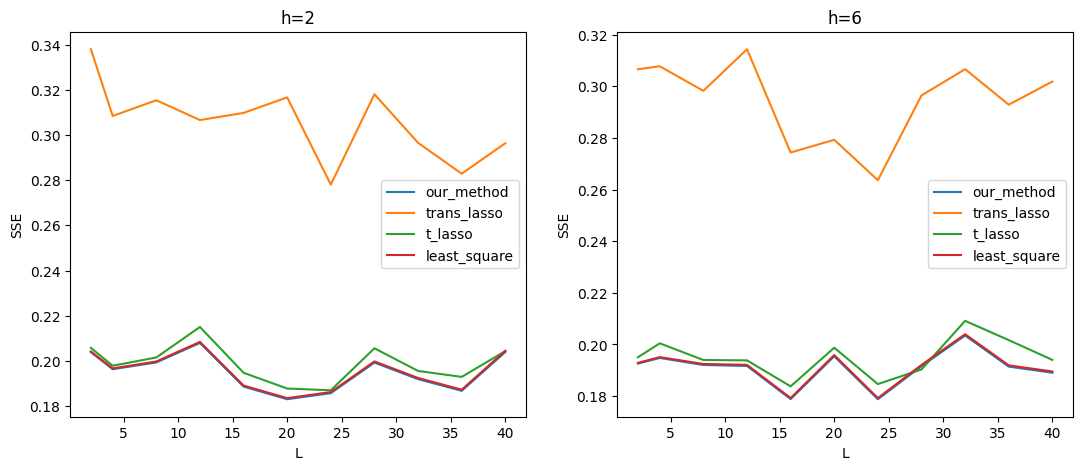

In [14]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

In [11]:
result=np.load('log/result_list8-1.npy')

### 测试9：t21(不独立同分布、不同质、固定差异)，与三模型对比


In [15]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t21_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('log/result_list9'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [46:38<00:00, 254.43s/it]


In [16]:
result_list.shape

(2, 11, 4, 60)

In [17]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

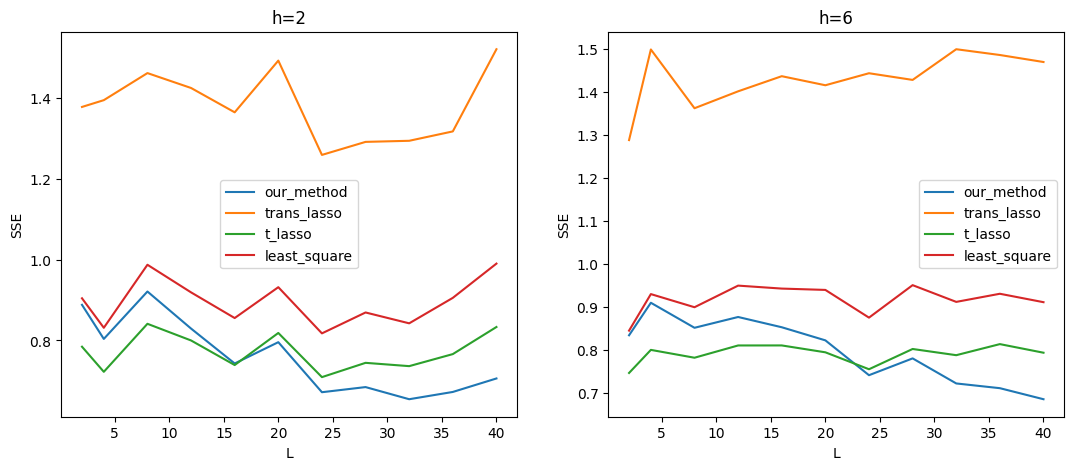

In [18]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()

### 测试10：t31(不独立同分布、不同质、固定差异)，与三模型对比


In [19]:
models=[Our_method(n_features,s,1),Trans_lasso(n_features,s,1),T_lasso(n_features,s,1),Least_square(n_features,s,1)]
#L=2,4,8,12,16,20 -?没有做L=0的代码
#多次实验取平均
import multiprocessing
workers=multiprocessing.cpu_count()
result_list=[]
for h in [2,6]:
    result_list.append([])
    for L in tqdm([2,4,8,12,16,20,24,28,32,36,40]):
    # for L in tqdm([2,4,8,12]):
        result_list[-1].append([])
        eval=evaluator(repeat_times=1,model_num=len(models))
        for i in range(60):#选一个可以被workers整除的数
            sample_packs,coef_true=t31_eval(n_features,s,n_packs,n_samples,h,L)
            eval.append(models,sample_packs,coef_true,s,L,False)
        eval.run(workers)
        result_list[-1][-1]=eval.result_list
#将result_list保存下来
result_list=np.array(result_list)
np.save('log/result_list10'+time.strftime("%m-%d", time.localtime())+'.npy',result_list)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [32:58<00:00, 179.85s/it]


In [20]:
result_list.shape

(2, 11, 4, 60)

In [21]:
result=np.mean(result_list,axis=3)
#将第二个轴和第三个轴交换
result=np.swapaxes(result,1,2)

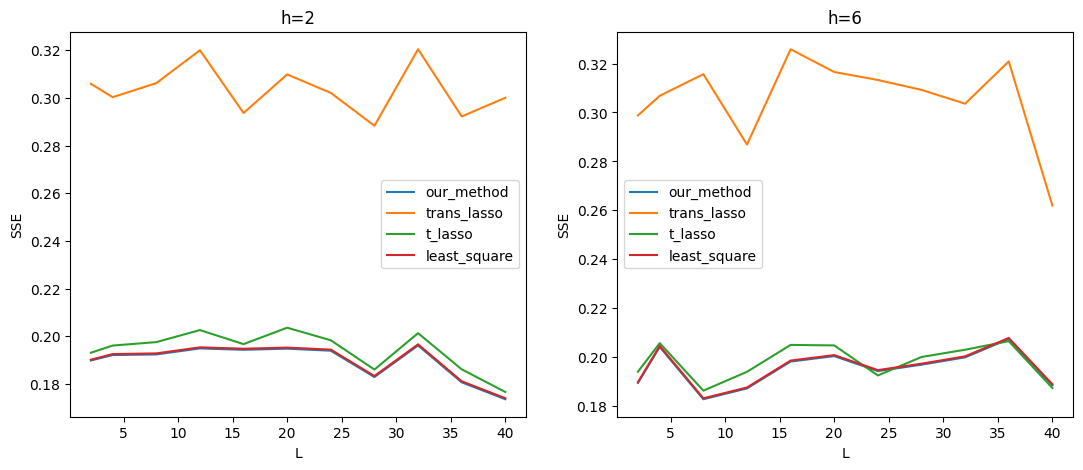

In [22]:
#画图，横轴是L，纵轴是SSE，依照h分三张图
fig=plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[0,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=2') 

plt.subplot(1,3,2)
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,0,:],label='our_method')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,1,:],label='trans_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,2,:],label='t_lasso')
plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[1,3,:],label='least_square')
plt.legend()
plt.xlabel('L')
plt.ylabel('SSE')
#设置y的范围为0~0.5
# plt.ylim(0,0.5)
plt.title('h=6')

# plt.subplot(1,3,3)
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,0,:],label='our_method')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,1,:],label='trans_lasso')
# plt.plot([2,4,8,12,16,20,24,28,32,36,40],result[2,2,:],label='t_lasso')
# plt.legend()
# plt.xlabel('L')
# plt.ylabel('SSE')
# #设置y的范围为0~0.5
# # plt.ylim(0,0.5)
# plt.title('h=12') 

#设置图像大小
plt.show()